##### 1.Defining the problem
    > What is the problem
    > Informal problem specification in one line
    > Formal specification : Task T, Experience E, Performance measure P
    > List assumptions
    > Why is it need to be solved and what is the benefit from solving it, how it will be used, motivation to solve the problem
    > How was it solved manually and programatically by a developer to flush domain knowledge.
    

##### 2. Data Preprocessing
    > What data is available to you?
    > What data is nice to have to solve the problem more effectively but not available?
    > What data is not important and can be removed and why? (feature reductions like pca, lda, spatial sign, correlated attrs)
    > Data formatting(encodings), data cleaning(null values treatment - imputation or removal, (mean/ median imputation, KNN imputation, MICE,Extrapolation, interpolation, DeepL Datawig, capping)), data sampling
    > Data transformation => standardisation, scaling/normalization, binning, removing skew(applying log or sqrt or inverse on attributes with larger/smaller values),  attribute decomposition(binary encoding, decomposing date with time to date and time), attribute aggreagation(age and date of birth, children and parents and spouse to family size)
    > Identify Outliers

#### Feature Engineering

Feature engineering is the process of transforming raw data into features that are meaningful to better represent the underlying problem to the predictive models. It is manually designing what the input x’s should be.FE is a representation problem.Feature Importance can be identified based on ranking scores, correlation scores with target agttribute, univariate scores and so on and the estimated useful features can be used to construct new features(eg:PCA) similar to the estimated ones.Some algorithms like random forest, MARS, Gradient boosting can internally report the feature importance in developed model.
   
    > Feature Extraction - Automatic construction of new features
        # Process of reducing the dimensions to create new lower meaningful dimensions using linear projection methods like PCA, LDA or unsupervised cluster methods for tabular data, line or edge detections for images and so on, meaninful words for textual data
        
    > Feature Selection - From many features to a few that are useful - selecting subset of features using scoring methods
        # Removing features that are irrelavant to the problem, redundant features, correlated features, features that are not highly correlated with target, iterative trail and error selection based on model performance with each subset, bake in feature selection methods(side effect of  models automatcally selecting best features) like step wise regression, regularisation methods like LASSO, ridge regression that discount the constribution of features
        
        > Feature Construction - Manual construction of features from raw data
            #This requires spending a lot of time with actual sample data (not aggregates) and thinking about the underlying form of the problem, structures in the data and how best to expose them to predictive modeling algorithms.
            Examples: With tabular data, it often means a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features.With textual data, it often means devising document or context specific indicators relevant to the problem. With image data, it can often mean enormous amounts of time prescribing automatic filters to pick out relevant structures.
            
         > Feature Learning / Representational Learning - The automatic identification and use of features in raw data by learning
          It is a set of techniques that allows a system to automatically discover the representations needed for feature detection or classification from raw data in a black box manner. This replaces manual feature engineering and allows a machine to both learn the features and use them to perform a specific task.Eg: deep learning models like auto encoders, restricted boltzmann machines
         
The ML path with feature engineering
1. Define problem
2. Select Data ( Integrate data from a db, de-normalize it into a dataset, collect it together)
3. Data preprocessing ( encodings(formatting), binning, null values handling(cleaning, using median, capping, removing null values, KNN imputation. fillna), sampling)
4. Feature engineering ( data transformation, feature construction, feature extraction, feature selection, handling outliers iterative trying goes hand in hand with 5 and 6 steps
5. Modeling
6. Evaluate and tuning

In [767]:
!pip install category_encoders

In [1071]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, r2_score, f1_score, log_loss, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from category_encoders import CountEncoder, BinaryEncoder, TargetEncoder, HashingEncoder, LeaveOneOutEncoder, OrdinalEncoder

In [1072]:
#Loading the data
titanic = pd.read_csv("E:\Learning\ML\Datasets\data\\titanic_kaggle\\titanic_train.csv", delimiter=',')
titanic.shape

(891, 12)

In [1073]:
#Loading the actual test data
X_test_actual = pd.read_csv("E:\Learning\ML\Datasets\data\\titanic_kaggle\\test.csv", delimiter=',')
X_test_actual.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1074]:
#Seperating the target from input data for training data
X = titanic.loc[:, titanic.columns != 'Survived']
Y = titanic['Survived']

#### Descriptive Statistics

In [1075]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1076]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1077]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [1078]:
X.shape

(891, 11)

In [1079]:
Y.shape

(891,)

In [1084]:
#Finding out the null values in train set
X.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False


In [1081]:
x_test_actual.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [1082]:
#Finding the count of null values in each feature of train data set
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1083]:
#Finding the count of null values in each feature of train data set
x_test_actual.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [233]:
# X.corrwith(X.Cabin) #X.Cabin should have numerical values to find the correlation

#### Observation:
    Looks like we have na values in few attributes Cabin, Age and Embarked for training data and in Age, Fare, Cabin for test data.Lets use seaborn to visualise them

<AxesSubplot:>

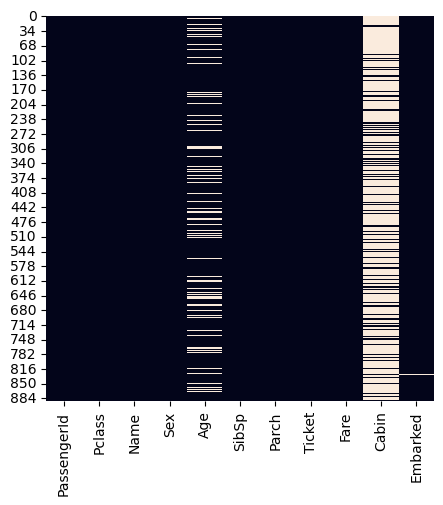

In [1085]:
sns.heatmap(X.isna(), cbar=False)

<AxesSubplot:>

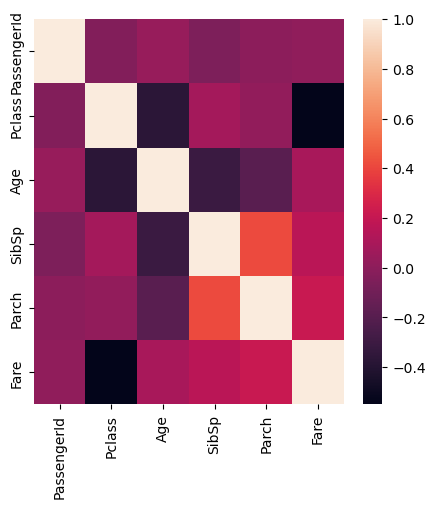

In [1086]:
#Heat Map before transforming all the values to numeric
sns.heatmap(X.corr(), cbar=True)

In [1087]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Oberservation
    By observing the data, we can see that there are lot of categorical features like Pclass, sex, embarked.Lets identify the unique values of all categorical values and encode them using Label or Onehotencoding.

#### Note:
    Since there missing values in both test set and training set, for imputation we will combine the datasets and perform the imputation together

In [1088]:
#Combining both test and training data for imputation
train_test_data = {'train': X, 'test': X_test_actual}

In [1090]:
for idx, set in enumerate(train_test_data):
    print("Unique values for Pclass in {} set are {}".format(set, train_test_data[set].Pclass.unique()))

Unique values for Pclass in train set are [3 1 2]
Unique values for Pclass in test set are [3 2 1]


#### Observation:
    As ticket clas(Pclass) is hierarchichal ordering and it has some meaning w.r.to hierarchy.Hence it is meaningful to keep it as it is as 1, 2, 3 which represents hierarchy just like label encoding.

In [1091]:
#Check the unique values of Parents/children attribute.
for idx, set in enumerate(train_test_data):
    print("Unique values for Parch in {} set are {}".format(set, train_test_data[set].Parch.unique()))

#no need to further encode as we have numerical values that represents count

Unique values for Parch in train set are [0 1 2 5 3 4 6]
Unique values for Parch in test set are [0 1 3 2 4 6 5 9]


In [1092]:
#Check the unique values of Sibling/Spouse attribute
for idx, set in enumerate(train_test_data):
    print("Unique values for SibSp in {} set are {}".format(set, train_test_data[set].SibSp.unique()))

#no need to further encode as we have numerical values that represents count

Unique values for SibSp in train set are [1 0 3 4 2 5 8]
Unique values for SibSp in test set are [0 1 2 3 4 5 8]


In [1094]:
#Check the unique values of Embarked attribute
for idx, set in enumerate(train_test_data):
    print("Unique values for Embarked in {} set are {}".format(set, train_test_data[set].Embarked.unique()))

Unique values for Embarked in train set are ['S' 'C' 'Q' nan]
Unique values for Embarked in test set are ['Q' 'S' 'C']


In [1095]:
#Counting the null values from Embarked feature in training set
X.Embarked.isna().sum()

2

In [1096]:
#Handling the nan values to 'Other'
X_emb_other = X.copy() #Better practice to use "loc" or "copy" to avoid chained copy warnings
X_emb_other['Embarked'].fillna('Other', inplace=True)
X_emb_other['Embarked_Other'] = X_emb_other.Embarked

In [1097]:
X_emb_other.Embarked_Other.unique()

array(['S', 'C', 'Q', 'Other'], dtype=object)

In [1098]:
X_emb_other.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Other
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S


In [1099]:
#Handling the nan values with most frequent
X_emb_freq = X.copy()
rep_with = X_emb_freq.Embarked.mode()[0]
X_emb_freq.Embarked.fillna(rep_with, inplace=True)
X_emb_freq['Embarked_freq'] = X_emb_freq.Embarked

In [1100]:
X_emb_freq.Embarked_freq.isna().sum()

0

In [1101]:
X_emb_freq['Embarked_freq'].value_counts()

S    646
C    168
Q     77
Name: Embarked_freq, dtype: int64

In [1102]:
X_emb_freq.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_freq
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S


#### Observation:
    Now that we have imputed the null values of Embarked feature, we can now one hot encode them.

In [1103]:
embarkedencoder = OneHotEncoder()
X_embarked = embarkedencoder.fit_transform(X_emb_freq[['Embarked_freq']])
X_emb_freq = X_emb_freq.join(pd.DataFrame(X_embarked.toarray(), columns=embarkedencoder.get_feature_names_out()))

In [1104]:
X_emb_freq.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_freq,Embarked_freq_C,Embarked_freq_Q,Embarked_freq_S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1.0,0.0,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,S,0.0,0.0,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,S,0.0,0.0,1.0


In [1105]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1106]:
#One hot encoding the feature 'Sex' to avoid prioirities issues of label encoding
onehotencoder = OneHotEncoder()
X_Sex = onehotencoder.fit_transform(X[['Sex']])

In [1107]:
#One hot encoder gives a sparse matrix.We can use toarray() to change it toarray() and then we can convert it to a pd dataframe
X_Sex

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [1108]:
#Joining the one hot encoded feature (from "Sex" to Sex_female, Sex_male) to input X
X_sex_ohen = X.copy()
X_sex_ohen = X_sex_ohen.join(pd.DataFrame(X_Sex.toarray(), columns=onehotencoder.get_feature_names_out()))
X_sex_ohen.head()

#Note: we will join this encoded feature to original array after all the features transformations

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


#### ......................................... Handling numerical attribute - Fare.........................................

In [1110]:
#Finding the min and max of it
print("Min Fare :{}, Maximum Fare: {}".format(X.Fare.min(), X.Fare.max()))

Min Fare :0.0, Maximum Fare: 512.3292


In [1111]:
#Check the number of persons for each fare
print(X.Fare.value_counts())

#Check the unique fare values
print(list(X.Fare.unique()))

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 31.275, 7.8542, 16.0, 29.125, 13.0, 18.0, 7.225, 26.0, 8.0292, 35.5, 31.3875, 263.0, 7.8792, 7.8958, 27.7208, 146.5208, 7.75, 10.5, 82.1708, 52.0, 7.2292, 11.2417, 9.475, 21.0, 41.5792, 15.5, 21.6792, 17.8, 39.6875, 7.8, 76.7292, 61.9792, 27.75, 46.9, 80.0, 83.475, 27.9, 15.2458, 8.1583, 8.6625, 73.5, 14.4542, 56.4958, 7.65, 29.0, 12.475, 9.0, 9.5, 7.7875, 47.1, 15.85, 34.375, 61.175, 20.575, 34.6542, 63.3583, 23.0, 77.2875, 8.6542, 7.775, 24.15, 9.825, 14.4583, 247.5208, 7.1417, 22.3583, 6.975, 7.05, 14.5, 15.0458, 26.2833, 9.2167, 79.2, 6.75, 11.5, 36.75, 7.7958, 12.525, 66.6, 7.3125, 61.3792, 7.7333, 69.55, 16.1, 15.75, 20.525, 55.0, 25.925, 33.5, 30.6958, 25.4667, 28.7125, 0.0, 15.05, 39.0, 22.025, 50.0,

#### Observation
    Fare is of type float.Since there are 248 unique fare values, it is advisable to change the fare to int data type

In [1112]:
X_fare_int = X.copy()
X_fare_int['Fare_int'] = X_fare_int.Fare.astype('int')
print(list(X_fare_int['Fare_int'].unique()))

[7, 71, 53, 8, 51, 21, 11, 30, 16, 26, 31, 29, 13, 18, 35, 263, 27, 146, 10, 82, 52, 9, 41, 15, 17, 39, 76, 61, 46, 80, 83, 73, 14, 56, 12, 47, 34, 20, 63, 23, 77, 24, 247, 22, 6, 79, 36, 66, 69, 55, 25, 33, 28, 0, 50, 113, 90, 86, 512, 153, 135, 19, 78, 91, 151, 110, 108, 262, 164, 134, 57, 133, 75, 211, 4, 227, 120, 32, 81, 89, 38, 49, 59, 93, 221, 106, 40, 42, 65, 37, 5]


In [1113]:
#Changing the range to log transform
X_fare_log = X.copy()
X_fare_log['Fare_log'] = np.log(X_fare_log['Fare'] + 1)
print(X_fare_log['Fare_log'].unique())

[2.1102132  4.28059312 2.18885633 3.99083419 2.20276476 2.24689266
 3.9676942  3.09444575 2.49595374 3.43626847 2.87356464 3.31600254
 3.47429294 2.18089192 2.83321334 3.40535539 2.63905733 2.94443898
 2.1071783  3.29583687 2.20046377 3.59731226 3.47777255 5.5759491
 2.18371146 2.18557926 3.3576216  4.99396918 2.1690537  2.44234704
 4.42089632 3.97029191 2.1076888  2.50484816 2.34899147 3.09104245
 3.75136587 2.80336038 3.1214482  2.93385687 3.70592092 2.17475172
 4.35323099 4.14280451 3.35863777 3.8691155  4.39444915 4.43645563
 3.3638416  2.78783441 2.21466057 2.26825241 4.31079913 2.73788081
 4.0517119  2.15755932 3.40119738 2.60083612 2.30258509 2.35137526
 2.17333026 3.87328218 2.82435066 3.56600536 4.12995299 3.07153524
 3.57386695 4.16446591 3.17805383 4.36038795 2.26739305 2.17190677
 3.2248579  2.38185827 2.73814608 5.51552654 2.096999   3.15095238
 2.07631165 2.08567209 2.74084002 2.77544713 3.30627479 2.32402364
 4.38452351 2.04769284 2.52572864 3.63098548 2.17427433 2.60453

In [1114]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1115]:
#Handling 'Name' attribute as we have handled every other feature
X.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

#### Observation:
    We have two features left: 'Name' and 'Ticket'.Name is different for almost every person.It doesn't make sense to model them if there is no correlation with one person to another person or with target variable 'Survival'.Though, we can think of extracting some info from 'Name' like titles 'Mr, Mrs, Miss etc' which help to identify the groups of individuals as per age and title available on the ship and their survival rates.We can also think of Surname's grouping and getting the total family size including parents,siblings, children, spouse as this family size count may affect the 'Survival' rate of the members.General idea is bigger families dont get much chance to get all family members survived.Model can learn these kind of relations if we provide signals as a new feature converying this info.Lets extract title from the name.

In [1116]:
print(list(X.Name))
#If we observe, the second string is the title for all the names

['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda Adolfina', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene', 'Williams, Mr. Charles Eugene', 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J', 'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"', 'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'Emir, Mr. Farred Chehab', 'Fortune, Mr. Charles Alexander', 'O\'Dwyer, Miss. Ellen "Nelli

In [729]:
#Splitting the 'Name' column to get the title
X_name_title = X.copy()
splitted_name = X_name_title.Name.str.split(" ", n=3, expand=True)
print(splitted_name)

              0      1          2                                 3
0       Braund,    Mr.       Owen                            Harris
1      Cumings,   Mrs.       John  Bradley (Florence Briggs Thayer)
2    Heikkinen,  Miss.      Laina                              None
3     Futrelle,   Mrs.    Jacques             Heath (Lily May Peel)
4        Allen,    Mr.    William                             Henry
..          ...    ...        ...                               ...
886   Montvila,   Rev.     Juozas                              None
887     Graham,  Miss.   Margaret                             Edith
888   Johnston,  Miss.  Catherine                    Helen "Carrie"
889       Behr,    Mr.       Karl                            Howell
890     Dooley,    Mr.    Patrick                              None

[891 rows x 4 columns]


In [730]:
print(splitted_name[1])

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: 1, Length: 891, dtype: object


In [731]:
splitted_name[1].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: 1, dtype: int64

#### Observation
    We could see that there are few titles with only one instance.It is good to group them and change them into single title.'Mlle', 'Ms', 'Mme' can be merged to Miss. Major and col, capt, Don, can be merged to Major.Other's can be merged to 'Other'

In [732]:
# splitted_name[1] = np.where((splitted_name[1] == 'Mlle.' | splitted_name[1] == 'Ms.' | splitted_name[1] == 'Mme') , 'Miss.', splitted_name[1])
# miss_list = ['Mlle.', 'Ms.', 'Mme.']
# condition_list = [splitted_name[1].str.contains(title)
#                  for title in miss_list]
# splitted_name[1] = np.select(condition_list, miss_list)
# def matcher(df):
#     for val in miss_list:
#         if val.lower() == df.lower():
#             df = 'Miss.'
# splitted_name[1].apply(matcher)

#Merge the titles
miss_list = ['Mlle.', 'Ms.', 'Mme.']
splitted_name = splitted_name.replace({1:
                                       {'Mlle.':'Miss.', 'Ms.':'Miss.',
                                        'Mme.':'Miss.', 'Col.':'Major.',
                                        'Capt.':'Major.', 'Don.' : 'Major',
                                       'Major':'Major.'}
                                      })

In [652]:
splitted_name[1].value_counts()

Mr.             502
Miss.           183
Mrs.            121
Master.          40
Dr.               7
Rev.              6
Major.            5
y                 4
Planke,           3
Impe,             3
Gordon,           2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Messemaeker,      1
der               1
Walle,            1
Carlo,            1
Steen,            1
Major             1
Mulder,           1
Pelsmaeker,       1
Billiard,         1
Cruyssen,         1
Name: 1, dtype: int64

In [733]:
#Making other persons whose count is either one or whose title is not meaningful to 'Other'
splitted_name[1] = splitted_name[1].replace(dict.fromkeys([
    'y', 'Planke,', 'Impe,', 'Gordon,', 'Melkebeke,', 'Jonkheer.', 'Shawah,', 'the',
    'Velde,', 'Messemaeker,', 'der', 'Walle,', 'Carlo,', 'Steen,', 'Major', 'Mulder,',
    'Pelsmaeker,', 'Billiard,', 'Cruyssen,'
], 'Others'), regex=True)

In [734]:
splitted_name[1].value_counts()

Mr.               502
Miss.             183
Mrs.              121
Master.            40
Others             25
Dr.                 7
Rev.                6
Others.             5
MulOthers,          1
CruOthersssen,      1
Name: 1, dtype: int64

In [735]:
splitted_name[1] = splitted_name[1].replace(dict.fromkeys(['MulOthers,', 'CruOthersssen,', 'Others.'], 'Others'), regex=True)

In [736]:
splitted_name[1].value_counts()

Mr.        502
Miss.      183
Mrs.       121
Master.     40
Others      32
Dr.          7
Rev.         6
Name: 1, dtype: int64

In [737]:
#Appending the title column to X_name_title
X_name_title['title'] = splitted_name[1]

In [738]:
X_name_title.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [739]:
#Finding the stats about 'Ticket' Feature
len(X.Ticket.unique())

681

In [740]:
X.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [741]:
list(X.Ticket.unique())

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '113783',
 'A/5. 2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC 17601',
 'PC 17569',
 '335677',
 'C.A. 24579',
 'PC 17604',
 '113789',
 '2677',
 'A./5. 2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris 2123',
 '330958',
 'S.C./A.4. 23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4. 39886',
 'PC 17572',
 '2926',
 '113509',
 '19947',
 'C.A. 31026',
 '2697',
 'C.A. 34651',
 'CA 2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC 17605',
 '2661',
 'C.A. 29395',
 'S.P. 3464',
 '3101281',
 '315151',
 'C.A. 33111',
 'S.O.C. 14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SO/C 14885',
 '3101278',
 'W./C. 6608',
 

#### Observation
    The 'Ticket' feature has 681 unique values and if we observe, we can see the ticket number with few values having the deck numbers.It could be useful if we extract deck numbers but the number of tickets having deck name is less compared to tickets thar does not have any.Hence it is good to drop this column for now

In [742]:
#Dropping the ticket column
X_ticket_drop = X.copy()
X_ticket_drop = X_ticket_drop.drop('Ticket', axis=1)

In [743]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ..................................Handling Null values in ''Age, Cabin'' Features........................................

In [690]:
print("Unique features in cabin feature: {}".format(len(X.Cabin.unique())))
print("Total null values in Cabin categorical feature: {}".format(X.Cabin.isna().sum()))
print("Existing unique features are: \n{}".format(X.Cabin.unique()))

Unique features in cabin feature: 148
Total null values in Cabin categorical feature: 687
Existing unique features are: 
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84

In [691]:
X.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

#### .................To handle null values for Cabin category......................
    #1.We can drop the entire feature(loss of info)
    #2.We can replace missing values with most frequent features/categories(using mode, leads to overfitting)
    #2.We can perform target encoding based on fare values and impute the null values
    #3.We can training a classifier like random forest to impute the null values.
    #4.We can remove the rows having null values(loss of info, may be useful when having large amount of data)

In [692]:
#dropping the cabin column as it has more not-null values
X_cab_drop = X.copy()
X_cab_drop = X_cab_drop.drop(axis=1, columns=['Cabin'], errors='raise')

In [693]:
X_cab_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [751]:
#Replacing with most frequent values
X_cab_freq = X.copy()

# replace missing values with the mode of 'Cabin' category - leads to overfitting as we have more null values
replace_with = X_cab_freq['Cabin'].mode()[0]
print(replace_with)
X_cab_freq['Cabin_freq_imp'] = X_cab_freq['Cabin'].fillna(replace_with)

B96 B98


In [752]:
#Checking if we still have null values in Cabin column
X_cab_freq.Cabin_freq_imp.isna().sum()

0

In [757]:
X_cab_freq.Cabin_freq_imp.value_counts()

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin_freq_imp, Length: 147, dtype: int64

In [753]:
X_cab_freq.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_freq_imp
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,B96 B98
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,B96 B98
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,B96 B98


In [698]:
#Removing rows having null values - 687 rows will be removed and leads to information loss
X_cab_rows_rem = X.copy()
X_cab_rows_rem = X_cab_rows_rem[X_cab_rows_rem['Cabin'].notna()]
X_cab_rows_rem.shape

(204, 11)

#### ----------------- To handle null values for ''Age'' attribute ---------------------- 
    #We know that age has null values.We have to impute them before descritizing them into bins.

    #1.We cant remove the age feature because it will definitely correlated with 'Survival'
    #2.We can try imputing with most frequent values(mode)
    #3.We can remove rows containing null values
    #4.We can train a classifier to predict the null values of age
    #5. Target encoding w.r.to 'Survival'
    #6.Imputing using KNN

In [699]:
print(X.Age.value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


#### Observation:
    We could see that the age is in the format of floats.Hence we will convert this to int.Also we could see that Age also contains infants and older people.May be we can see what is rate of survival based on Age. To check the correlation, first we have to impute and descritize age.

In [700]:
print("Total null values in age: {}".format(X.Age.isna().sum()))

Total null values in age: 177


In [701]:
#Impute with frequent values
X_age_freq = X.copy()
print(X_age_freq.info())
repeat_with = X_age_freq.Age.mode()[0]
X_age_freq.Age.fillna(repeat_with, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


In [702]:
X_age_freq.Age.isnull().sum()

0

In [703]:
#Remove the rows with null age
X_age_rem = X.copy()
X_age_rem = X_age_rem[X_age_rem['Age'].notna()]
X_age_rem.shape

(714, 11)

#### Info:
Remember, we didnt build a classifier earlier for imputation of 'Age' and 'Cabin' using classifiers as we dont have all other features in numerical format.Now that we ve done with that step, we can build models for classifier imputation.

In [832]:
#Lets recreate our original dataframe with all engineered features for handling null imputation of Age
X_age_clf_impute = X.copy()

#Lets onehot encode the sex variable
sex_ohe = OneHotEncoder()
encoded_sex = sex_ohe.fit_transform(X_age_clf_impute[['Sex']])
X_age_clf_impute = X_age_clf_impute.join(pd.DataFrame(encoded_sex.toarray(), columns=sex_ohe.get_feature_names_out()))

#onehot encode imputated Embarked column
embarkedencoder = OneHotEncoder()
encoded_embarked = embarkedencoder.fit_transform(X_emb_freq[['Embarked_freq']])
X_age_clf_impute = X_age_clf_impute.join(pd.DataFrame(encoded_embarked.toarray(), columns=embarkedencoder.get_feature_names_out()))

#join title to the input dataframe
X_age_clf_impute = X_age_clf_impute.join(X_name_title['title'])
#onehot encode imputated title column
titleencoder = OneHotEncoder()
encoded_title = titleencoder.fit_transform(X_age_clf_impute[['title']])
X_age_clf_impute = X_age_clf_impute.join(pd.DataFrame(encoded_title.toarray(), columns=titleencoder.get_feature_names_out()))

#join imputed Cabin with frequency to the input dataframe
X_age_clf_impute = X_age_clf_impute.join(X_cab_freq['Cabin_freq_imp'])
# #Binary encoding the imputed categorical cabin feature as there more than 100 unique cabin categories.
cabin_bencoder = BinaryEncoder(cols=['Cabin_freq_imp'])
encoded_cabin = cabin_bencoder.fit_transform(X_age_clf_impute['Cabin_freq_imp']) 
#encoder from category_encoders returns df when given df as i/p
X_age_clf_impute = X_age_clf_impute.join(encoded_cabin)

#Info: Binary encoding performs Ordinal/Label encoding first.then the number is chnage to binary form 1 -> 001, 2 -> 010, 3-> 100.
#Info: Then the binary number is split into columns.This may lead to some loss of info but useful when having high cardinality

#Join the log transform of fare to the input dataframe
X_age_clf_impute = X_age_clf_impute.join(X_fare_log['Fare_log'])
# X_age_clf_impute = X_age_clf_impute.join(X_fare_int['Fare_int'])

#Now drop the columns that have been encoded already to avoid redundancies of features
X_age_clf_impute = X_age_clf_impute.drop(axis=1,
                                         columns=[ 'Sex', 'Name', 'PassengerId', 'Embarked', 'title',
                                                  'Ticket', 'Fare', 'Cabin_freq_imp', 'Cabin']
                                        )
X_age_clf_impute.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_freq_C,Embarked_freq_Q,Embarked_freq_S,title_Dr.,...,title_Rev.,Cabin_freq_imp_0,Cabin_freq_imp_1,Cabin_freq_imp_2,Cabin_freq_imp_3,Cabin_freq_imp_4,Cabin_freq_imp_5,Cabin_freq_imp_6,Cabin_freq_imp_7,Fare_log
0,3,22.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,1,2.110213
1,1,38.0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1,0,4.280593
2,3,26.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,1,2.188856
3,1,35.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,1,1,3.990834
4,3,35.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,0,0,1,2.202765


In [829]:
X_age_clf_impute.isna().sum()

Pclass                0
Age                 177
SibSp                 0
Parch                 0
Sex_female            0
Sex_male              0
Embarked_freq_C       0
Embarked_freq_Q       0
Embarked_freq_S       0
title_Dr.             0
title_Master.         0
title_Miss.           0
title_Mr.             0
title_Mrs.            0
title_Others          0
title_Rev.            0
Cabin_freq_imp_0      0
Cabin_freq_imp_1      0
Cabin_freq_imp_2      0
Cabin_freq_imp_3      0
Cabin_freq_imp_4      0
Cabin_freq_imp_5      0
Cabin_freq_imp_6      0
Cabin_freq_imp_7      0
Fare_log              0
dtype: int64

#### Observation:
    Now that we have the dataset ready with all engineered features, We can use the classifier method also to impute the Features 'Age'

In [830]:
#Training a RF classifier for imputation of Cabin
#Imputing by classification
X_age_train = X_age_test = X_age_clf_impute.copy()

#Extract the data with age having values
X_age_train = X_age_train[X_age_train.Age.notna()]

#Extract the data with age having null values
X_age_test = X_age_test[X_age_test.Age.isna()]

#Separating the X and Y's
X_age = X_age_train.loc[:, X_age_train.columns != 'Age']
Y_age = X_age_train['Age']

#Sampling
X_age_tr , X_age_tes, Y_age_tr, Y_age_tes = train_test_split(X_age, Y_age, test_size=0.1)
print("Shapes - X_age_tr: {}, X_age_tes: {}, Y_age_tr: {}, Y_age_tes: {}".format(
    X_age_tr.shape, X_age_tes.shape, Y_age_tr.shape, Y_age_tes.shape))

#Training a RF classifier for imputation of Age
# rf_age_clf = KNeighborsRegressor(n_neighbors=10)
rf_age_clf = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=3)
rf_age_clf.fit(X_age_tr, Y_age_tr)
y_age_train_pred = rf_age_clf.predict(X_age_tr)
print("Training RMSE: %.2f"%(mean_squared_error(Y_age_tr, y_age_train_pred, squared=False)))

y_age_test_pred = rf_age_clf.predict(X_age_tes)
print("Test RMSE: %.2f"%(mean_squared_error(Y_age_tes, y_age_test_pred, squared=False)))

#Using the trained classifier to predict the Cabin for null values of Cabin.
X_age_test = X_age_test.drop(columns='Age', axis=1) #first drop the target variable Çabin with null values
y_age_null_test_preds = rf_age_clf.predict(X_age_test)

#Join the imputed target to the dropped dataframe back again
X_age_test.insert(1, 'Age', y_age_null_test_preds)

#Merge the dataframes together now
frames = [X_age_train, X_age_test]
age_clf_imputed = pd.concat(frames)

#no cabin(entirely) - train rmse - 8.94, test rmse - 10.93
#with fare - int , cabin binary encoding - training rmse - 8.83, test rmse - 10.64
#with cabin binary encoding, fare log - trian rmse - 8.68, test rmse - 10.04
#KNN performs worse comapred to RandomForest

Shapes - X_age_tr: (642, 24), X_age_tes: (72, 24), Y_age_tr: (642,), Y_age_tes: (72,)
Training RMSE: 8.68
Test RMSE: 10.04


In [831]:
#Checking the null values after imputation using classifier
age_clf_imputed.isna().sum()

Pclass              0
Age                 0
SibSp               0
Parch               0
Sex_female          0
Sex_male            0
Embarked_freq_C     0
Embarked_freq_Q     0
Embarked_freq_S     0
title_Dr.           0
title_Master.       0
title_Miss.         0
title_Mr.           0
title_Mrs.          0
title_Others        0
title_Rev.          0
Cabin_freq_imp_0    0
Cabin_freq_imp_1    0
Cabin_freq_imp_2    0
Cabin_freq_imp_3    0
Cabin_freq_imp_4    0
Cabin_freq_imp_5    0
Cabin_freq_imp_6    0
Cabin_freq_imp_7    0
Fare_log            0
dtype: int64

In [841]:
age_clf_imputed.Age.astype('int').value_counts()
pd.qcut(age_clf_imputed['Age'], q=10, labels=False, precision=0).value_counts()

3    100
7     95
4     95
2     91
6     90
0     90
1     89
8     85
9     84
5     72
Name: Age, dtype: int64

In [846]:
#Lets recreate our original dataframe with all engineered features for handling imputation of 'Cabin' using classifier
X_cabin_clf_impute = X.copy()

#Lets onehot encode the sex variable
sex_ohe = OneHotEncoder()
encoded_sex = sex_ohe.fit_transform(X_cabin_clf_impute[['Sex']])
X_cabin_clf_impute = X_cabin_clf_impute.join(pd.DataFrame(encoded_sex.toarray(), columns=sex_ohe.get_feature_names_out()))

#onehot encode imputated Embarked column
embarkedencoder = OneHotEncoder()
encoded_embarked = embarkedencoder.fit_transform(X_emb_freq[['Embarked_freq']])
X_cabin_clf_impute = X_cabin_clf_impute.join(pd.DataFrame(encoded_embarked.toarray(), columns=embarkedencoder.get_feature_names_out()))

#join title to the input dataframe
X_cabin_clf_impute = X_cabin_clf_impute.join(X_name_title['title'])
#onehot encode imputated title column
titleencoder = OneHotEncoder()
encoded_title = titleencoder.fit_transform(X_cabin_clf_impute[['title']])
X_cabin_clf_impute = X_cabin_clf_impute.join(pd.DataFrame(encoded_title.toarray(), columns=titleencoder.get_feature_names_out()))

#join imputed age using classifier to the  dataframe and descritize it
X_cabin_clf_impute['age_imputed_clf'] = age_clf_imputed['Age'].astype('int')
X_cabin_clf_impute['age_descritized'] = pd.qcut(X_cabin_clf_impute['age_imputed_clf'], q=10, labels=False, precision=0)

#Join the log transform of fare to the input dataframe
X_cabin_clf_impute = X_cabin_clf_impute.join(X_fare_log['Fare_log'])

#Now drop the columns that have been encoded already to avoid redundancies of features
X_cabin_clf_impute = X_cabin_clf_impute.drop(axis=1,
                                         columns=[ 'Sex', 'Name', 'PassengerId', 'Embarked', 'title',
                                                  'Ticket', 'Fare', 'Age', 'age_imputed_clf']
                                        )
X_cabin_clf_impute.head()

,Pclass,SibSp,Parch,Cabin,Sex_female,Sex_male,Embarked_freq_C,Embarked_freq_Q,Embarked_freq_S,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Others,title_Rev.,age_descritized,Fare_log
0,3,1,0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2.110213
1,1,1,0,C85,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,4.280593
2,3,0,0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2.188856
3,1,1,0,C123,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6,3.990834
4,3,0,0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,2.202765


In [854]:
#Training RF classifier or KNN by making 'Cabin column with values' as target.(as a training set)
#Then using the trained model to predict the 'Cabin' for the rows that has null Cabin values(as a test set)

X_cab_train = X_cab_test = X_cabin_clf_impute.copy()

#Extract the not null values to learn a classifier
X_cab_train = X_cab_train[X_cab_train['Cabin'].notna()]

#Extract the null values to predict the Cabin category using the learned classifier
X_cab_test = X_cab_test[X_cab_test['Cabin'].isna()]

print("Not null Training set shape:{}".format(X_cab_train.shape))
print("Null Test set shape:{}".format(X_cab_test.shape))

#Separating and Splitting the data for sampling into train and test for model learning
X_cab = X_cab_train.loc[:, X_cab_train.columns!='Cabin']
Y_cab = X_cab_train['Cabin']
#Label encoding the categorical target
y_cab_le = LabelEncoder()
y_cab_encoded = y_cab_le.fit_transform(Y_cab)

#sampling
X_c_train, X_c_test, Y_c_train, Y_c_test = \
train_test_split(
    X_cab, y_cab_encoded, test_size=0.1, random_state=0, shuffle=True
)

print("Shapes - X_c_train: {}, X_c_test: {}, Y_c_train: {}, Y_c_test: {}".format(
    X_c_train.shape, X_c_test.shape, Y_c_train.shape, Y_c_test.shape))

#We will train the classifier for imputation once we transform all the features to numerical values
rf_cab_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3)
rf_cab_clf.fit(X_c_train, Y_c_train)
y_c_train_pred = rf_cab_clf.predict(X_c_train)
print("Training accuracy: %.2f"%(accuracy_score(Y_c_train, y_c_train_pred)))

y_c_test_pred = rf_cab_clf.predict(X_c_test)
print("Test accuracy: %.2f"%(accuracy_score(Y_c_test, y_c_test_pred)))

#Using the trained classifier to predict the Cabin for null values of Cabin.
X_cab_test = X_cab_test.drop(columns='Cabin', axis=1) #first drop the target variable Çabin with null values
y_cab_null_test_preds = rf_cab_clf.predict(X_cab_test)


#Join the imputed target to the dropped dataframe back again
X_cab_test.insert(3, 'Cabin', y_cab_null_test_preds)

#Merge the dataframes together now
frames = [X_cab_train, X_cab_test]
cab_clf_imputed = pd.concat(frames)

#The classifier is not showing very bad accuracy as we have learned the classifier of very less data

Not null Training set shape:(204, 18)
Null Test set shape:(687, 18)
Shapes - X_c_train: (183, 17), X_c_test: (21, 17), Y_c_train: (183,), Y_c_test: (21,)
Training accuracy: 0.85
Test accuracy: 0.14


In [858]:
cab_clf_imputed.Cabin.value_counts()

140    307
145    119
116     58
90      56
144     35
      ... 
E63      1
A14      1
B37      1
C30      1
57       1
Name: Cabin, Length: 186, dtype: int64

In [857]:
cab_clf_imputed.isna().sum()

Pclass             0
SibSp              0
Parch              0
Cabin              0
Sex_female         0
Sex_male           0
Embarked_freq_C    0
Embarked_freq_Q    0
Embarked_freq_S    0
title_Dr.          0
title_Master.      0
title_Miss.        0
title_Mr.          0
title_Mrs.         0
title_Others       0
title_Rev.         0
age_descritized    0
Fare_log           0
dtype: int64

#### Observation:
    Now that we have imputed and treated all the features lest create a final data frame and do the training and testing

In [937]:
#Adding the imputed embarked category to the original dataframe
inp = titanic.copy()

#Lets onehot encode the sex variable
sex_ohe = OneHotEncoder()
encoded_sex = sex_ohe.fit_transform(inp[['Sex']])
inp = inp.join(pd.DataFrame(encoded_sex.toarray(), columns=sex_ohe.get_feature_names_out()))

#onehot encode imputated Embarked column
inp = inp.join(X_emb_freq.Embarked_freq)
embrkdencoder = OneHotEncoder()
encoded_embarked = embrkdencoder.fit_transform(inp[['Embarked_freq']])
inp = inp.join(pd.DataFrame(encoded_embarked.toarray(), columns=embrkdencoder.get_feature_names_out()))

#Add the log transformed Fare
inp = inp.join(X_fare_log['Fare_log'])

#join imputed age using classifier to the  dataframe and descritize it
inp['age_imputed_clf'] = age_clf_imputed['Age'].astype('int')
inp['age_descritized'] = pd.qcut(inp['age_imputed_clf'], q=10, labels=False, precision=0)

#join imputed Cabin using classifier to the input dataframe and binary encode it
inp['cab_imputed_clf'] = cab_clf_imputed['Cabin']
# #Binary encoding the imputed categorical cabin feature as there more than 100 unique cabin categories.
cabin_bencoder = BinaryEncoder(cols=['cab_imputed_clf'])
encoded_cabin = cabin_bencoder.fit_transform(inp['cab_imputed_clf']) 
#encoder from category_encoders returns df when given df as i/p
inp = inp.join(encoded_cabin)

#add the title
#join title to the input dataframe
inp = inp.join(X_name_title['title'])
#onehot encode imputated title column
titleencoder = OneHotEncoder()
encoded_title = titleencoder.fit_transform(inp[['title']])
inp = inp.join(pd.DataFrame(encoded_title.toarray(), columns=titleencoder.get_feature_names_out()))

#Dropping the redundant features
inp = inp.drop(['Sex', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 
                'Embarked_freq', 'age_imputed_clf', 'cab_imputed_clf', 'title'], axis=1)
inp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Sex_female',
       'Sex_male', 'Embarked_freq_C', 'Embarked_freq_Q', 'Embarked_freq_S',
       'Fare_log', 'age_descritized', 'cab_imputed_clf_0', 'cab_imputed_clf_1',
       'cab_imputed_clf_2', 'cab_imputed_clf_3', 'cab_imputed_clf_4',
       'cab_imputed_clf_5', 'cab_imputed_clf_6', 'cab_imputed_clf_7',
       'title_Dr.', 'title_Master.', 'title_Miss.', 'title_Mr.', 'title_Mrs.',
       'title_Others', 'title_Rev.'],
      dtype='object')

In [938]:
inp.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_freq_C,Embarked_freq_Q,Embarked_freq_S,...,cab_imputed_clf_5,cab_imputed_clf_6,cab_imputed_clf_7,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Others,title_Rev.
0,1,0,3,1,0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,1,0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,0,0,1.0,0.0,0.0,0.0,1.0,...,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,1,0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,0,0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

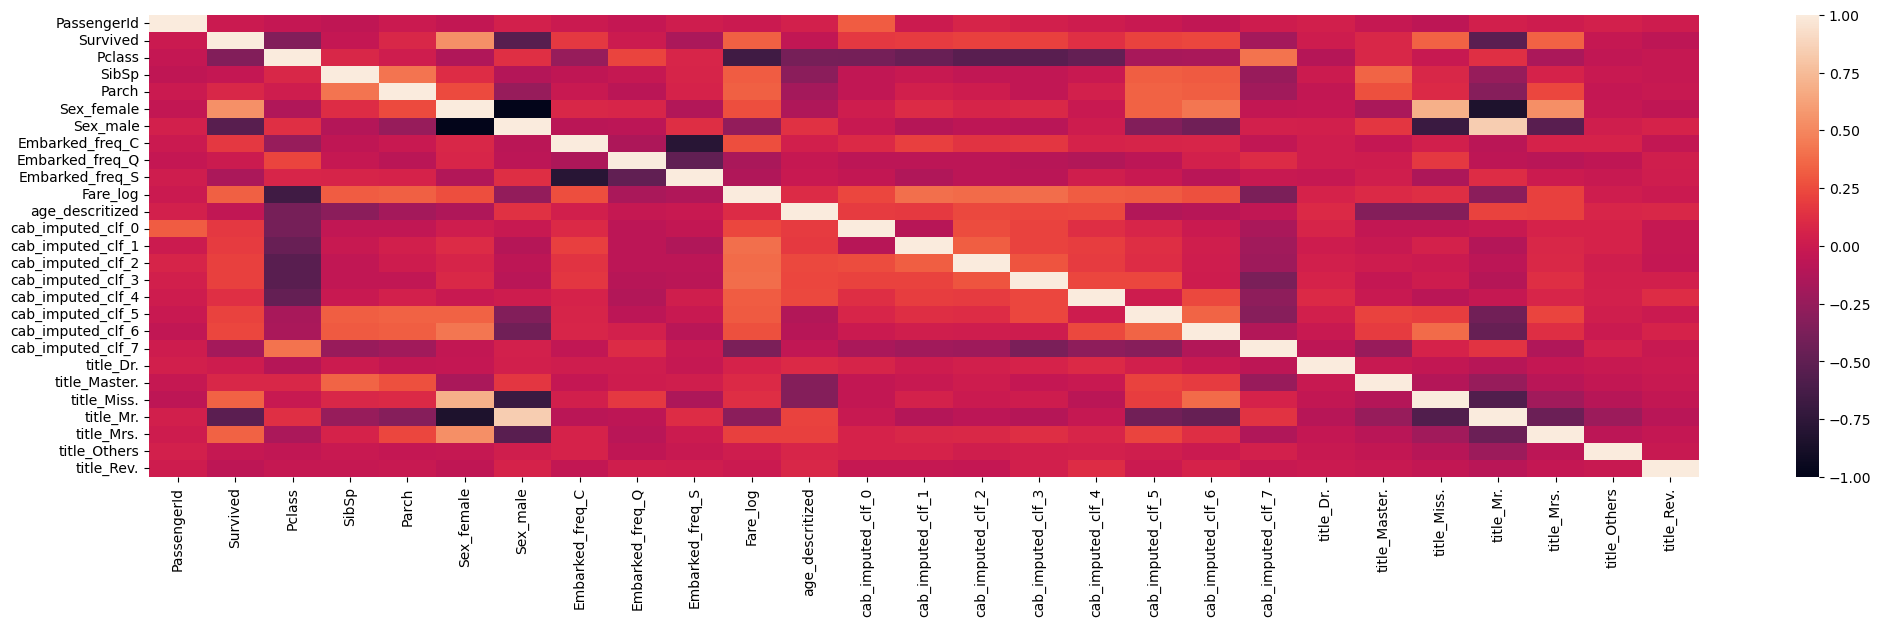

In [939]:
sns.heatmap(inp.corr(), cbar=True)

#### Observation:
    Looks like Sex_female, titleMrs, Fare, title Miss, embarked are highly correlated

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Sex_female', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Sex_male', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Embarked_freq_C', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Embarked_freq_Q', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Embarked_freq_S', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare_log', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='age_descritized', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='cab_imputed_clf_0', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='cab_imputed_clf_1', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='cab_imputed_clf_2', ylabel='PassengerId'>,
   

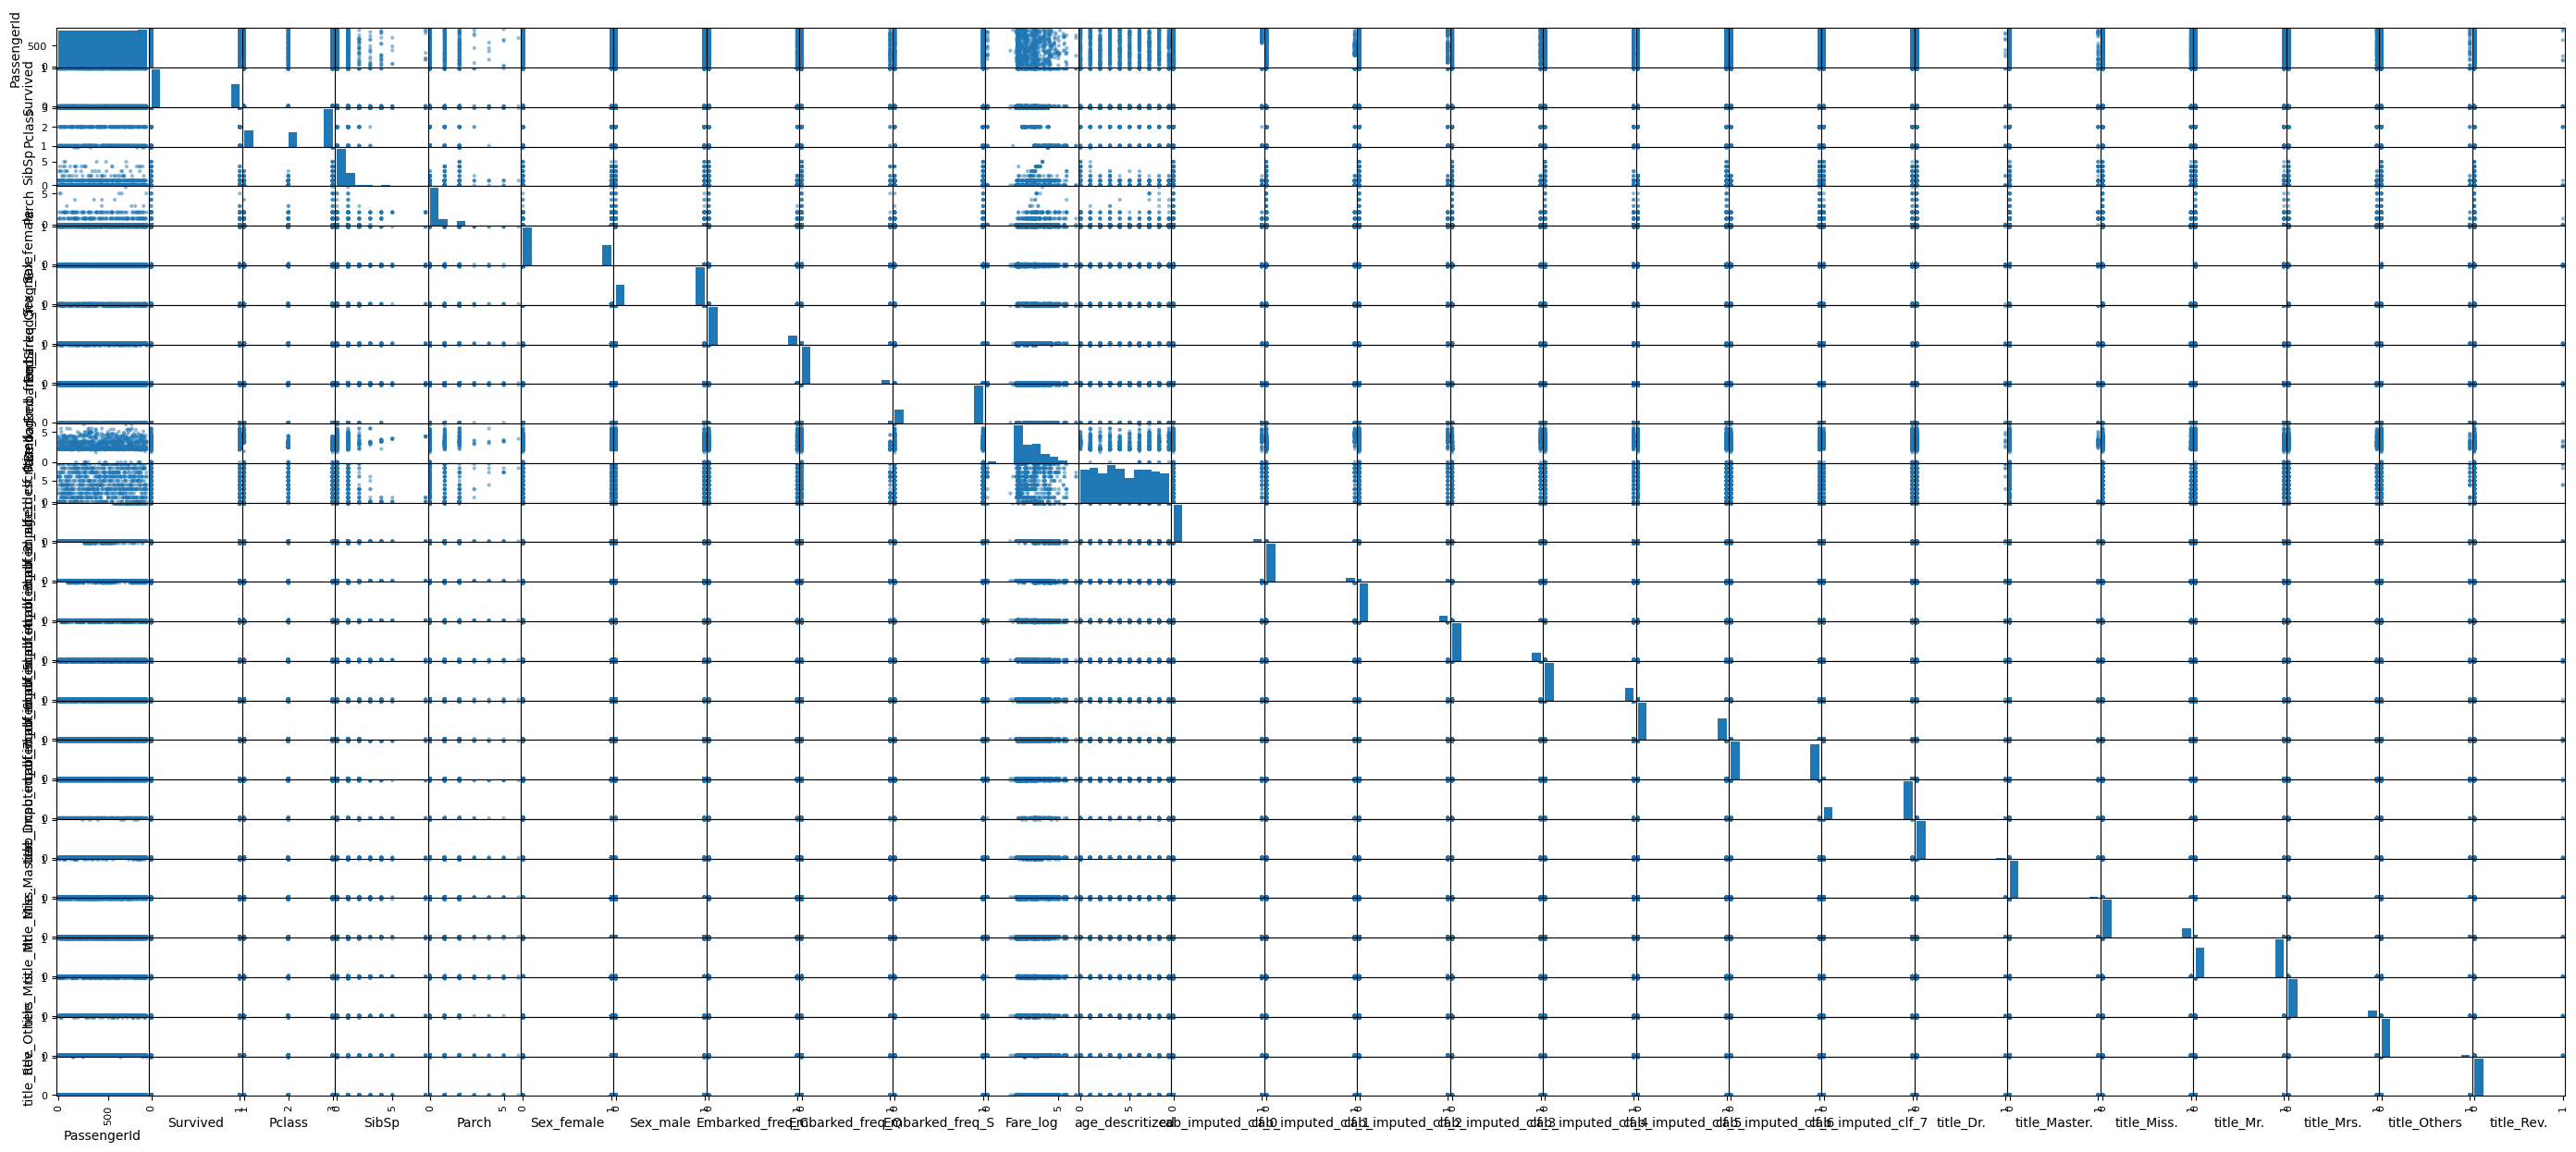

In [940]:
import pandas.plotting as pdplt
plt.rcParams["figure.figsize"] = (35,15)
pdplt.scatter_matrix(inp)

<AxesSubplot:>

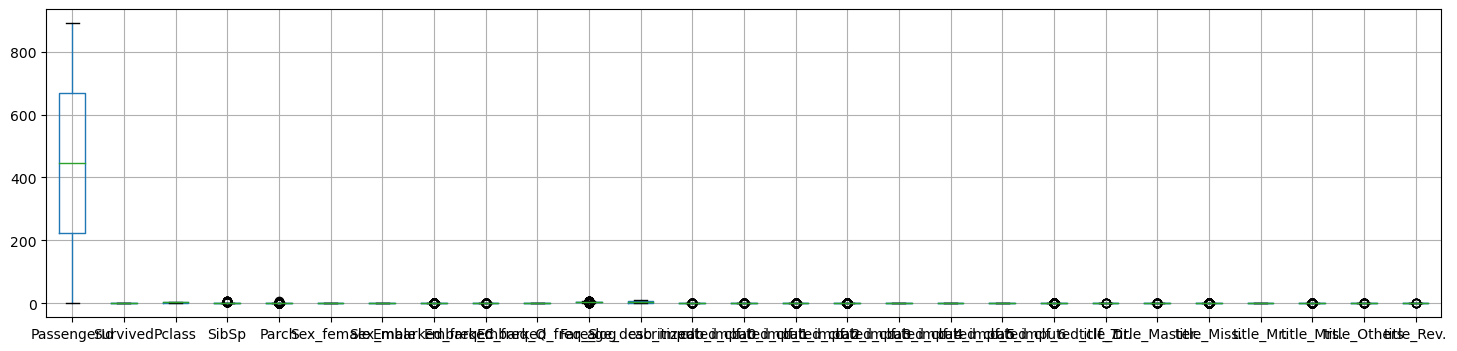

In [948]:
plt.rcParams["figure.figsize"] = (18, 4)
pdplt.boxplot(inp)

#### Observation:
    We will drop PassengerID when splitting.We need the passengerID for test set when submitting in kaggle.Hence keeping it till the split.Also, Age range is in different range compared to other.May be we can Standardise everything using Standard Scaler

In [1001]:
#Separating X and Y
X = inp.loc[:, inp.columns != 'Survived']
Y = inp.Survived

In [1002]:
#Preprocessing
scaler = StandardScaler()
X_required = X.loc[:, X.columns != 'PassengerId']
columns = X_required.columns
X_standardised = scaler.fit_transform(X_required)
X_transformed = pd.DataFrame(X_standardised, columns=columns)

<AxesSubplot:>

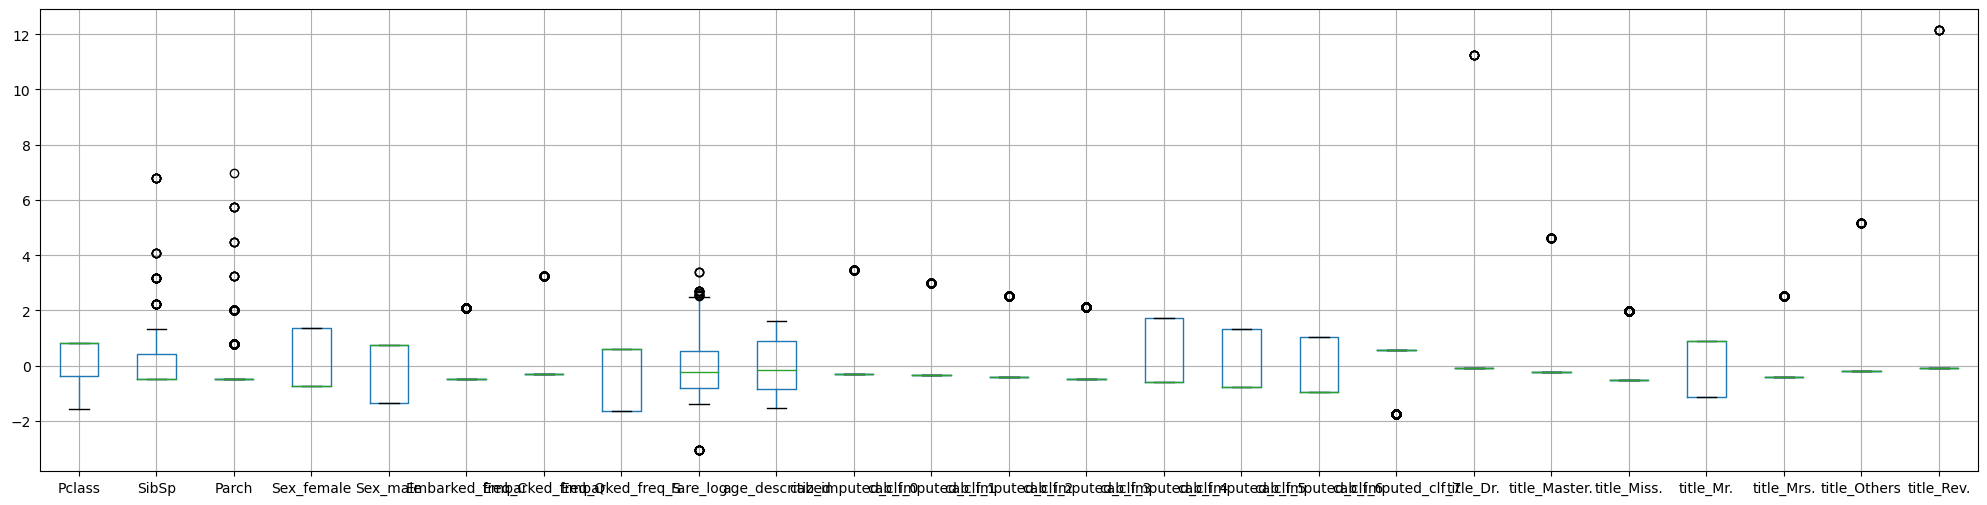

In [973]:
plt.rcParams['figure.figsize'] = (25, 6)
pdplt.boxplot(X_transformed)

In [1003]:
X_transformed = X_transformed.join(X.PassengerId)

In [1004]:
#Sampling
X_train, test_inp, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.469, random_state=0, shuffle=True)

#Dropping unused passengerID
X_train = X_train.drop('PassengerId', axis=1)
X_test = test_inp.drop('PassengerId', axis=1).copy()

#Training using Logisticregression
logisticclf = LogisticRegression(solver='liblinear')
logisticclf.fit(X_train, Y_train)
y_train_preds = logisticclf.predict(X_train)
y_pred_logistic = logisticclf.predict(X_test)
print("Training score: %.2f"%(accuracy_score(Y_train, y_train_preds)))
print("Test score: %.2f"%(accuracy_score(Y_test, y_pred_logistic)))
print("F1 score: {}".format(f1_score(Y_test, y_pred_logistic)))

Training score: 0.84
Test score: 0.81
F1 score: 0.7459807073954985


In [1006]:
#Training using Random forest
rfclf = RandomForestClassifier()
rfclf.fit(X_train, Y_train)
y_train_preds = rfclf.predict(X_train)
y_pred_rf = rfclf.predict(X_test)
print("Training score: %.2f"%(accuracy_score(Y_train, y_train_preds)))
print("Test score: %.2f"%(accuracy_score(Y_test, y_pred_rf)))
print("F1 score: {}".format(f1_score(Y_test, y_pred_rf)))

Training score: 0.97
Test score: 0.80
F1 score: 0.7284768211920529


In [1007]:
#Training using SVM
svmclf = SGDClassifier()
svmclf.fit(X_train, Y_train)
y_train_preds = svmclf.predict(X_train)
y_pred_svm = svmclf.predict(X_test)
print("Training score: %.2f"%(accuracy_score(Y_train, y_train_preds)))
print("Test score: %.2f"%(accuracy_score(Y_test, y_pred_svm)))
print("F1 score: {}".format(f1_score(Y_test, y_pred_svm)))

Training score: 0.80
Test score: 0.78
F1 score: 0.7331378299120234


In [1008]:
#Training using KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, Y_train)
print("Training score: {}".format(knn_clf.score(X_train, Y_train)))
y_pred_knn = knn_clf.predict(X_test)
print("Test score: {}".format(accuracy_score(Y_test, y_pred_knn)))
print("F1 score: {}".format(f1_score(Y_test, y_pred_knn)))

Training score: 0.8879492600422833
Test score: 0.7942583732057417
F1 score: 0.7189542483660132


In [1009]:
#Training using Decision tree
dec_tree_clf = DecisionTreeClassifier()
dec_tree_clf.fit(X_train, Y_train)
print("Training score : {}".format(dec_tree_clf.score(X_train, Y_train)))
Y_pred_dec_tree = dec_tree_clf.predict(X_test)
print("Test score: {}".format(accuracy_score(Y_test, Y_pred_dec_tree)))
print("F1 score: {}".format(f1_score(Y_test, Y_pred_dec_tree)))

Training score : 0.9746300211416491
Test score: 0.7416267942583732
F1 score: 0.6447368421052633


CV score: 0.78
Training score: 0.9746300211416491
Test score: 0.8133971291866029
F1 score: 0.7364864864864864
Recall score: 0.7077922077922078


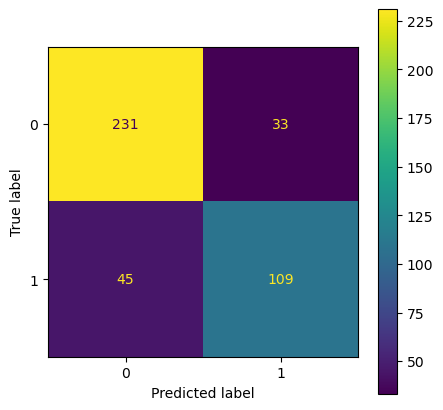

In [1027]:
#Training using Random Forest and Kfold CV
cv = KFold(n_splits=10, random_state=0, shuffle=True)
rf_cv_clf = RandomForestClassifier()
training_score = cross_val_score(rf_cv_clf, X_train, Y_train, cv=cv, error_score='raise', scoring='accuracy')
print("CV score: %.2f"%(training_score.mean()))
rf_cv_clf.fit(X_train, Y_train)
print("Training score: {}".format(rf_cv_clf.score(X_train , Y_train)))
Y_pred_rf_cv = rf_cv_clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_rf_cv)
print("Test score: {}".format(accuracy_score(Y_test, Y_pred_rf_cv)))
print("F1 score: {}".format(f1_score(Y_test, Y_pred_rf_cv)))
print("Recall score: {}".format(recall_score(Y_test, Y_pred_rf_cv)))
plt.rcParams["figure.figsize"] = (5,5)
ConfusionMatrixDisplay(cm).plot()

#### Observation:
    Out of all the models, Random Forest classifier with 10 fold cross validation in performing well.Hence choosing that model to predict the test data set

In [1024]:
#Submission
final_result = pd.DataFrame(test_inp['PassengerId'])
final_result['Survived'] = Y_pred_rf_cv
final_result = final_result.sort_values(by=['PassengerId'])
final_result

,PassengerId,Survived
1,2,1
2,3,1
5,6,0
6,7,0
8,9,1
...,...,...
885,886,1
886,887,0
887,888,1
889,890,1


In [1026]:
# Save to csv file
final_result.to_csv('TitanicSurvivalPrediction.csv', index=False)